In [ ]:


import pandas as pd
dataframe= pd.read_csv('/datos_marketing.csv')
print(dataframe.head())
print(dataframe.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       635         88              546              172   
1  08-03-2014        11          1                6                2   
2  21-08-2013       426         49              127              111   
3  10-02-2014        11          4               20               10   
4  19-01-2014       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88    

# Sección nueva

In [ ]:
#Renombro las columnas#
nuevos_nombres = {'ID': 'identidad', 'Year_Birth': 'año_de_nacimiento_del_cliente', 'Education': 'educacion', 'Marital_Status': 'estado_civil_del_cliente',
                  'Income': 'ingreso_anual_del_cliente_en_dolares','Kidhome': 'numero_de_niños_en_la_casa', 'Teenhome': 'numero_de_jovenes_en_la_casa',
                  'Dt_Customer': 'fecha_desde_cuando_la_persona_es_cliente','MntWines': 'monto_de_dinero_mensual_gastado_en_licores','MntFruits': 'monto_de_dinero_mensual_gastado_en_frutas_y_verduras',
                 'MntMeatProducts': 'monto_de_dinero_mensual_gastado_en_carnes', 'MntFishProducts': 'monto_de_dinero_mensual_gastado_en alimentos_del_mar',
                  'MntSweetProducts': 'monto_de_dinero_mensual_gastado_en productos_para_merienda','MntGoldProds': 'monto_de_dinero_mensual_gastado_en_productos_suntuosos',
                  'NumDealsPurchases': 'número_de_compras_realizadas', 'NumWebPurchases': 'número_de_compras_realizadas_en_el_sitio_web', 'NumCatalogPurchases': 'número_de_compras_realizadas_por_catálogo',
                  'NumStorePurchases': 'número_de_compras_realizadas_en_la_tienda', 'Complain': 'si_el_cliente_se_quejó_en_los_últimos_dos_años',
                  'AcceptedCmps': 'número_de_campañas_de_publicidad_aceptadas_en_los_últimos_dos_años'}
dataframe= dataframe.rename(columns=nuevos_nombres)
dataframe ['si_el_cliente_se_quejó_en_los_últimos_dos_años'].unique()
dic1={'yes':1,'no':0}
dataframe['si_el_cliente_se_quejó_en_los_últimos_dos_años'] = dataframe['si_el_cliente_se_quejó_en_los_últimos_dos_años'].map(dic1)
dataframe['si_el_cliente_se_quejó_en_los_últimos_dos_años'].unique()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   identidad                                                           2240 non-null   int64  
 1   año_de_nacimiento_del_cliente                                       2240 non-null   int64  
 2   educacion                                                           2240 non-null   object 
 3   estado_civil_del_cliente                                            2240 non-null   object 
 4   ingreso_anual_del_cliente_en_dolares                                2216 non-null   float64
 5   numero_de_niños_en_la_casa                                          2240 non-null   int64  
 6   numero_de_jovenes_en_la_casa                                        2240 non-null   int64  
 7   fecha_desde_cua

In [ ]:
dataframe['edad'] = 2023 - dataframe['año_de_nacimiento_del_cliente']
dataframe['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

In [ ]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

dataframe['cat_edad'] = dataframe.apply(function2, axis=1)
dataframe['cat_edad'].describe()
dataframe.info()
dataframe['cat_ingreso_anual_del_cliente_en_dolares'] = pd.cut(dataframe['ingreso_anual_del_cliente_en_dolares'], 4, labels=['muy bajo', 'bajo', 'medio', 'alto'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   identidad                                                           2240 non-null   int64   
 1   año_de_nacimiento_del_cliente                                       2240 non-null   int64   
 2   educacion                                                           2240 non-null   category
 3   estado_civil_del_cliente                                            2240 non-null   category
 4   ingreso_anual_del_cliente_en_dolares                                2240 non-null   float64 
 5   numero_de_niños_en_la_casa                                          2240 non-null   int64   
 6   numero_de_jovenes_en_la_casa                                        2240 non-null   int64   
 7   fecha_

In [ ]:
print(dataframe.head())
dataframe.info()

   identidad  año_de_nacimiento_del_cliente   educacion  \
0       5524                           1957  Graduation   
1       2174                           1954  Graduation   
2       4141                           1965  Graduation   
3       6182                           1984  Graduation   
4       5324                           1981         PhD   

  estado_civil_del_cliente  ingreso_anual_del_cliente_en_dolares  \
0                   Single                               58138.0   
1                   Single                               46344.0   
2                 Together                               71613.0   
3                 Together                               26646.0   
4                  Married                               58293.0   

   numero_de_niños_en_la_casa  numero_de_jovenes_en_la_casa  \
0                           0                             0   
1                           1                             1   
2                           0                  

In [ ]:
print(dataframe.describe())


          identidad  año_de_nacimiento_del_cliente  \
count   2240.000000                    2240.000000   
mean    5592.159821                    1968.805804   
std     3246.662198                      11.984069   
min        0.000000                    1893.000000   
25%     2828.250000                    1959.000000   
50%     5458.500000                    1970.000000   
75%     8427.750000                    1977.000000   
max    11191.000000                    1996.000000   

       ingreso_anual_del_cliente_en_dolares  numero_de_niños_en_la_casa  \
count                           2216.000000                 2240.000000   
mean                           52247.251354                    0.444196   
std                            25173.076661                    0.538398   
min                             1730.000000                    0.000000   
25%                            35303.000000                    0.000000   
50%                            51381.500000                    

In [ ]:
#DATOS NULOS #ingreso_anual_del_cliente_en_dolares#
dataframe['ingreso_anual_del_cliente_en_dolares'].fillna(dataframe['ingreso_anual_del_cliente_en_dolares'].mean(), inplace=True)

hay_nulos_columna = dataframe['ingreso_anual_del_cliente_en_dolares'
].isnull().any()

if hay_nulos_columna:
    print("Aún hay valores nulos en la columna ''ingreso_anual_del_cliente_en_dolares''.")
else:
    print("No hay valores nulos en la columna ''ingreso_anual_del_cliente_en_dolares''.")
    print(dataframe.info())





No hay valores nulos en la columna ''ingreso_anual_del_cliente_en_dolares''.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   identidad                                                           2240 non-null   int64   
 1   año_de_nacimiento_del_cliente                                       2240 non-null   int64   
 2   educacion                                                           2240 non-null   category
 3   estado_civil_del_cliente                                            2240 non-null   category
 4   ingreso_anual_del_cliente_en_dolares                                2240 non-null   float64 
 5   numero_de_niños_en_la_casa                                          2240 non-null   int64   
 6   numero_de_jovenes_en_la_cas

In [ ]:
#DATOS O VALORES ATIPICOS ESTADISTICAS DESCRIPTIVAS#
estadisticas = dataframe.describe()
print(estadisticas)



          identidad  año_de_nacimiento_del_cliente  \
count   2240.000000                    2240.000000   
mean    5592.159821                    1968.805804   
std     3246.662198                      11.984069   
min        0.000000                    1893.000000   
25%     2828.250000                    1959.000000   
50%     5458.500000                    1970.000000   
75%     8427.750000                    1977.000000   
max    11191.000000                    1996.000000   

       ingreso_anual_del_cliente_en_dolares  numero_de_niños_en_la_casa  \
count                           2216.000000                 2240.000000   
mean                           52247.251354                    0.444196   
std                            25173.076661                    0.538398   
min                             1730.000000                    0.000000   
25%                            35303.000000                    0.000000   
50%                            51381.500000                    

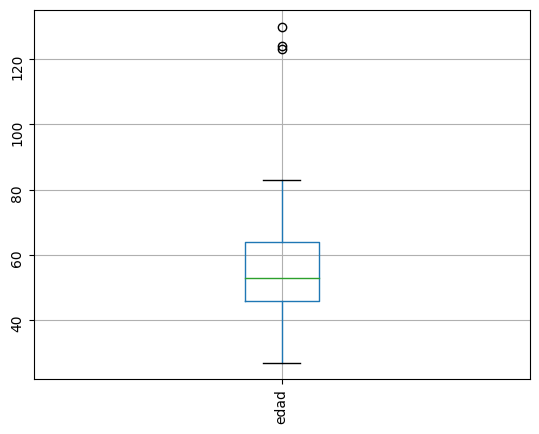

In [ ]:
#DATOS O VALORES ATIPICOS DIAGRAMAS DE CAJA (BOX PLOTS)#
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dataframe.boxplot(column='edad', ax=ax)
ax.tick_params(rotation=90)
plt.show()



In [ ]:
for column in dataframe.select_dtypes(['int64', 'float64']).columns:
  fig, ax = plt.subplots(1, 1)
  dataframe.boxplot(column=column, ax=ax)
  ax.tick_params(rotation=90)
  plt.show()

In [ ]:
column_name = "edad" #CORRECCION DATO ATIPICO EDAD#
outlier_index = dataframe[dataframe[column_name] > 120].index
median = dataframe[column_name].median()
dataframe.loc[outlier_index, column_name] = median
for column in dataframe.select_dtypes(['int64', 'float64']).columns:
  fig, ax = plt.subplots(1, 1)
  dataframe.boxplot(column=column, ax=ax)
  ax.tick_params(rotation=90)
  plt.show()

In [ ]:
column_name01 = "ingreso_anual_del_cliente_en_dolares" #CORRECCION DATO ATIPICO ingreso_anual_del_cliente_en_dolares#
outlier_index = dataframe[dataframe[column_name01] >60000].index
median = dataframe[column_name01].median()
dataframe.loc[outlier_index, column_name01] = median
for column in dataframe.select_dtypes(['int64', 'float64']).columns:
  fig, ax = plt.subplots(1, 1)
  dataframe.boxplot(column=column, ax=ax)
  ax.tick_params(rotation=90)
  plt.show()

In [ ]:
#DATOS O VALORES DUPLICADOS#
duplicados = dataframe.duplicated()
print(duplicados)

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool


In [ ]:
#DATYPE#
dataframe['educacion'] = dataframe['educacion'].astype('category')
dataframe['cat_edad'] = dataframe['cat_edad'].astype('category')
dataframe['estado_civil_del_cliente'] = dataframe['estado_civil_del_cliente'].astype('category')

In [ ]:
#COMPARARTIVO ENTRE LAS PREFERENCIAS DE COMPRA SEGUN LA EDAD Y LA ACEPTACION DE LAS CAMPAÑAS POLITICAS#
dataframe.groupby(['cat_edad', 'número_de_campañas_de_publicidad_aceptadas_en_los_últimos_dos_años']).agg({'número_de_compras_realizadas_por_catálogo':'mean',
                                              'número_de_compras_realizadas_en_la_tienda':'mean',
                                              'número_de_compras_realizadas_en_el_sitio_web':'mean' })

número_de_compras_realizadas_por_catálogo  \
cat_edad     número_de_campañas_de_publicidad_aceptadas_en_l...                                              
adulto       0                                                                                    1.846698   
             1                                                                                    2.977099   
             2                                                                                    5.675676   
             3                                                                                    6.200000   
             4                                                                                    6.666667   
adulto joven 0                                                                                    2.340659   
             1                                                                                    3.937500   
             2                                                                                    7.428571   
             3                                                                                    7.000000   
             4                                                                                    5.000000   
adulto mayor 0                                                                                    2.527446   
             1                                                                                    4.511236   
             2                                                                                    4.846154   
             3                                                                                    6.666667   
             4                                                                                    7.666667   

                                                                 número_de_compras_realizadas_en_la_tienda  \
cat_edad     número_de_campañas_de_publicidad_aceptadas_en_l...                                              
adulto       0                                                                                    5.047170   
             1                                                                                    5.656489   
             2                                                                                    7.945946   
             3                                                                                    8.480000   
             4                                                                                   12.000000   
adulto joven 0                                                                                    5.197802   
             1                                                                                    6.187500   
             2                                                                                   10.285714   
             3                                                                                    8.000000   
             4                                                                                    9.000000   
adulto mayor 0                                                                                    5.936754   
             1                                                                                    7.269663   
             2                                                                                    7.717949   
             3                                                                                    7.066667   
             4                                                                                    6.166667   

                                                                 número_de_compras_realizadas_en_el_sitio_web  
cat_edad     número_de_campañas_de_publicidad_aceptadas_en_l...                                                
adulto       0                                                                                     

La primera conclusión a la que podemos llegar es que la gente es mas propensa a comprar en tiendas fisicas sin importar su rango de edad; por lo cual nuestra primera propuesta para elevar las ventas es: incentivar la compra en las tiendas fisicas a traves de eventos, demostraciones de productos o actividades interactivas que tengan como eje central la experiencia del cliente en el punto fisico brindandoles un motivo extra para visitar las tiendas.
Otra popuesta es el de otrogar descuentos, regalos y/o accesorios a todos aquellos clientes que compren de manera recurrente en las tiendas.
Sin dejar del lado las compras por catálogo proponemos incluir diversas promociones y /o cupones que únicamente se encuentren dentro del catálogo y que sólo se puedan redimir en tiendas físicas para de tal manera motivar a los clientes a revisar constantemente el catálogo y a visitar los puntos físicos.
Por ultimo podemos evidenciar es que las compras en la web son las de menor cantidad al mes, para ello nuestra propuesta es: Hacer una pagina web mucho intuitiva a la que ya existe con botones de atención personalizada,carritos de compra y un campo de calificación y comentarios que otros clientes puedan ver.

In [ ]:
#COMPARATIVO ENTRE LA PREFERENCIA DE GASTOS SEGUN EL ESTADO CIVIL#
dataframe.groupby(['estado_civil_del_cliente']).agg({'monto_de_dinero_mensual_gastado_en_licores':'mean','monto_de_dinero_mensual_gastado_en_frutas_y_verduras':'mean'})

,monto_de_dinero_mensual_gastado_en_licores,monto_de_dinero_mensual_gastado_en_frutas_y_verduras
estado_civil_del_cliente,,
Absurd,355.500000,84.500000
Alone,184.666667,4.000000
Divorced,324.844828,27.426724
Married,299.480324,25.734954
Single,288.331250,26.835417
Together,306.825862,25.350000
Widow,369.272727,33.090909
YOLO,322.000000,3.000000


La segunda conclusión es que para aumentar en gran medida la compra que se da en bebidas alcohólicas en el grupo poblacional: de viudas, divorciados y solteros, proponemos campañas de marketing de experiencia, en las cuales el mensaje principal es que las personas asocien la compra de bebidas alcohólicas a momentos sociales y de relajación como un "plan disfrute en compañía de amigos, familia su novi@ o su mascota" sin dejar de lado la importancia de generar responsabilidad y conciencia sobre el consumo de alcohol, indicándole a los consumidores los límites, la hidratación  y alimentación antes de consumir este tipo de bebidas logrando que los clientes vean en nosotros una imagen de marca comprometida con la seguridad de nuestros clientes.
Otra propuesta esta enfocada a crear promociones en dias donde se esten presentando menores ventas de bebidas alcoholicas ya que esto va a lograr que los clientes a pesar de ser un dia de bajo consumo de bebidas alcoholicas (un dia entre semana o un dia sin que sea una fecha especial) se vea incentivado a comprar por un menor costo.
 Por ultimo tambien proponemos desarrollar una carta o videos interactivos que le enseñen a nuestros clientes recetas sobre como hacer cocteles, maridaje de comida y consejos sobre la variedad de formas en las que se pueden utilizar las bebidas alcohólicas.

In [ ]:
#COMPARATIVO ENTRE COMO LA CANTIDAD DE NIÑOS O ADOLECENTES IFLUYE EN LAS QUEJAS DEL CLIENTE DEPENDIENDO LA EDAD#
dataframe.groupby(['cat_edad', 'si_el_cliente_se_quejó_en_los_últimos_dos_años']).agg({'numero_de_niños_en_la_casa':'mean','numero_de_jovenes_en_la_casa':'mean'})

numero_de_niños_en_la_casa  \
cat_edad     si_el_cliente_se_quejó_en_los_últimos_dos_años                               
adulto       0                                                                 0.592664   
             1                                                                 0.875000   
adulto joven 0                                                                 0.389831   
             1                                                                 0.500000   
adulto mayor 0                                                                 0.301408   
             1                                                                 0.545455   

                                                             numero_de_jovenes_en_la_casa  
cat_edad     si_el_cliente_se_quejó_en_los_últimos_dos_años                                
adulto       0                                                                   0.363900  
             1                                                                   0.125000  
adulto joven 0                                                                   0.000000  
             1                                                                   0.000000  
adulto mayor 0                                                                   0.700469  
             1                                                                   0.909091

Lo que proponemos para disminuir las quejas de clientes es desarrollar un contenido que ofrezca una información apta para menores y adolescentes para tratar de evitar descontentos y quejas con los diferentes productos; a la par que, mediante vídeos en redes sociales, blogs o foros de participación se buscará brindarles a los padres soluciones y guías para enfrentar cualquier posible problemática a la hora de adquirir algún producto para ellos o para sus hijos.